In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


#Dataset Loading And Exploration

##Dataset

The exploratory analysis utilises the **Online Retail Dataset** from the UCI Machine Learning Repository. The data consists of invoice data from a UK-based retailer between December 2010 and December 2011.

Source: UCI Machine Learning Repository
Link: https://archive.ics.uci.edu/dataset/352/online+retail

The project focuses on the exploratory analysis of weekly aggregated revenue, including trend, variability and autocorrelation, in order to diagnose stationarity and to prepare the series for time series modelling. With the goal of the project being stationarity diagnostics and not time-series forecasting.

In [5]:
dataset = pd.read_excel("./Online Retail.xlsx")

In [6]:
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##Data Preperation & Aggregation

###Data Preprocessing

In [8]:
print(f"Negative Price: {dataset[dataset['UnitPrice'] < 0].shape}")

Negative Price: (2, 8)


In [9]:
print(dataset[dataset['UnitPrice'] < 0])

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


In [10]:
print(f"Negative Quantity: {dataset[dataset['Quantity'] < 0].shape}")

Negative Quantity: (10624, 8)


In [11]:
print(dataset[dataset['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [12]:
print(f"Null Values: {dataset.isnull().sum()}")

Null Values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [13]:
counts = dataset['InvoiceNo'].value_counts()
print(f"Duplicate invoices: {counts[counts>1]}")

Duplicate invoices: InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C555596       2
551401        2
C551335       2
551334        2
560416        2
Name: count, Length: 20059, dtype: int64


In [14]:
null_id_mask = dataset[dataset['CustomerID'].isnull()]

In [15]:
print(null_id_mask)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  Unit

In [16]:
null_description_mask = dataset[dataset['Description'].isnull()]

In [17]:
null_description_mask.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [18]:
null_description_mask.shape

(1454, 8)

In [19]:
unit_price_mask = dataset[dataset['UnitPrice'] == 0]

In [20]:
unit_price_mask.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [21]:
unit_price_mask.shape

(2515, 8)

In [22]:
dataset.groupby('StockCode')['Description'].apply(
    lambda x: x.isna().all()
).value_counts()

,count
Description,
False,3958
True,112


In [23]:
dataset['Description'] = (
    dataset.groupby('StockCode')['Description']
           .transform(lambda x: x.ffill().bfill())
)

/tmp/ipython-input-2971329427.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.ffill().bfill())


In [24]:
dataset[dataset['Description'].isnull()].shape

(112, 8)

In [25]:
dataset.groupby('StockCode')['UnitPrice'].apply(
    lambda x: (x == 0).all()
).value_counts()

,count
UnitPrice,
False,3938
True,132


In [26]:
dataset['UnitPrice'] = (
    dataset.groupby('StockCode')['UnitPrice']
           .transform(lambda x: x.replace(0, np.nan).ffill().bfill())
)

In [27]:
dataset[dataset['UnitPrice'].isnull()].shape

(134, 8)

In [28]:
unknown_stock = dataset[dataset['UnitPrice'].isnull() & dataset['Description'].isnull()]
dataset = dataset[dataset['Description'].notna()]

In [29]:
unknown_customer = dataset[dataset['CustomerID'].isnull()]
print(unknown_customer.head(5))

     InvoiceNo StockCode                       Description  Quantity  \
622     536414     22139  RETROSPOT TEA SET CERAMIC 11 PC         56   
1443    536544     21773   DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774   DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                POLKADOT RAIN HAT          4   
1446    536544     21787             RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       4.25         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom  


In [30]:
dataset.groupby(dataset['CustomerID'].notna())['InvoiceNo'].nunique()

,InvoiceNo
CustomerID,
False,3598
True,22190


In [31]:
dataset[dataset['UnitPrice'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,NaN,NaN,United Kingdom
82794,543257,84611B,thrown away,-1430,2011-02-04 16:06:00,NaN,NaN,United Kingdom
82795,543258,84611B,thrown away,1287,2011-02-04 16:06:00,NaN,NaN,United Kingdom
82796,543259,84612B,thrown away,-162,2011-02-04 16:07:00,NaN,NaN,United Kingdom
115489,546126,35611B,thrown away,-27,2011-03-09 14:52:00,NaN,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,NaN,NaN,United Kingdom
131398,547559,72759,thrown away-can't sell.,-524,2011-03-23 17:27:00,NaN,NaN,United Kingdom
131399,547560,72732,thrown away-can't sell,-2472,2011-03-23 17:28:00,NaN,NaN,United Kingdom
185113,552733,23059,Thrown away-rusty,-2376,2011-05-11 10:48:00,NaN,NaN,United Kingdom
254130,559296,23001,TRAVEL CARD WALLET DOTCOMGIFTSHOP,200,2011-07-07 12:35:00,NaN,NaN,United Kingdom


In [32]:
damages_other = dataset[dataset['UnitPrice'].isnull()]
dataset = dataset[~dataset['UnitPrice'].isnull()]
dataset = dataset[dataset['UnitPrice'] > 0]

In [33]:
print(f"Null Values: {dataset.isnull().sum()}")

Null Values: InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134944
Country             0
dtype: int64


In [34]:
uknown_customer = dataset[dataset['CustomerID'].isnull()]
#dataset = dataset[~dataset['CustomerID'].isnull()]

While exploring the data I have found missing values for columns: Description, CustomerID these values that could be recovered have been filled in the rest has been left as blank since an empty CustomerID could mean a client without an account and the missing Description is not relevant to the revenue analysis. Any returns, broken items and debt adjustments have been excluded from the dataset as they reflect post sale adjustments rather than new demand and therefore have been treated as noise for the purpose of the time series analysis.



###Revenue Calculation

In [38]:
dataset["TotalPaid"] = dataset["UnitPrice"] * dataset["Quantity"]

In [39]:
print(f"TotalPaid: Min: {dataset["TotalPaid"].min()} Max: {dataset["TotalPaid"].max()}")

TotalPaid: Min: -168469.6 Max: 184600.0


In [40]:
print(f"This years revenue: {dataset['TotalPaid'].sum()}")

This years revenue: 9686373.475


Weekly revenue has been calculated by aggregating the daily quantity of products sold over a week and multiplying it with the UnitPrice per product. Weekly aggregation has been chosen as the most appropriate due to the data only being available for a year thus, it will be able to reflect trend and seasonality of the data appropriately.

In [41]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Weekly'] = dataset['InvoiceDate'].dt.to_period('W')
dataset['Weekly'] = dataset['Weekly'].dt.to_timestamp()
product_timeline_weeks = (
    dataset
    .groupby(['StockCode', 'Weekly'])['TotalPaid']
    .sum()
    .reset_index()
)


In [42]:
top_products = (
    dataset.groupby('StockCode')['TotalPaid']
           .sum()
           .sort_values(ascending=False)
           .head(5)
           .index
)

In [43]:
revenue_weekly = dataset.groupby('Weekly')['TotalPaid'].sum()

In [44]:
quantity_per_week = (
    dataset
    .groupby(['Weekly'])['Quantity']
    .sum()
    .reset_index()
    .set_index('Weekly')
)
print(revenue_weekly.dtypes)
print(type(revenue_weekly.index[0]))
print(quantity_per_week.dtypes)
print(type(quantity_per_week.index[0]))

float64
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Quantity    int64
dtype: object
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


##Before Log Transformation

###Revenue

Text(0.5, 1.0, 'Weekly Revenue')

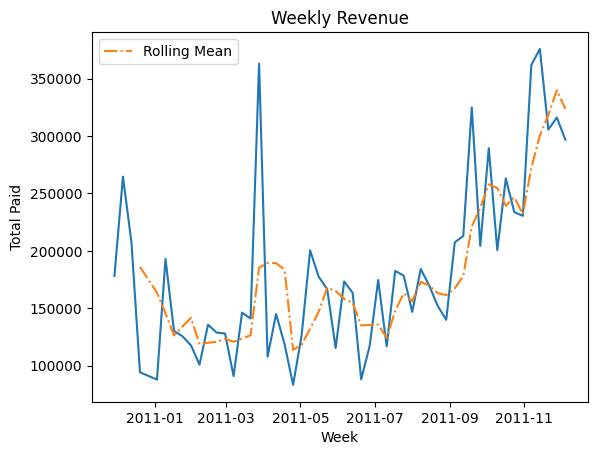

In [45]:
plt.plot(revenue_weekly.index, revenue_weekly)
mean_per_week_revenue = revenue_weekly.rolling(4).mean()
plt.plot(revenue_weekly.index,mean_per_week_revenue,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid')
plt.title('Weekly Revenue')

The plot above shows the raw revenue data plotted over a course of a year aggregated by weeks presented by the blue line. As we can see there is a clear holiday effects as the revenue drops after December 2010 and raises again in December 2011. Also we can see a clear positive trend as the total revenue has gradually increased since December 2010. Through looking at our rolling mean we can see a gradual increase indicating that the series is non-stationary. As a result transformations are required before applying time-series models motivating the use of log transformations and first order differencing to remove the effect of the trend on the series.

Text(0.5, 1.0, 'Weekly Revenue')

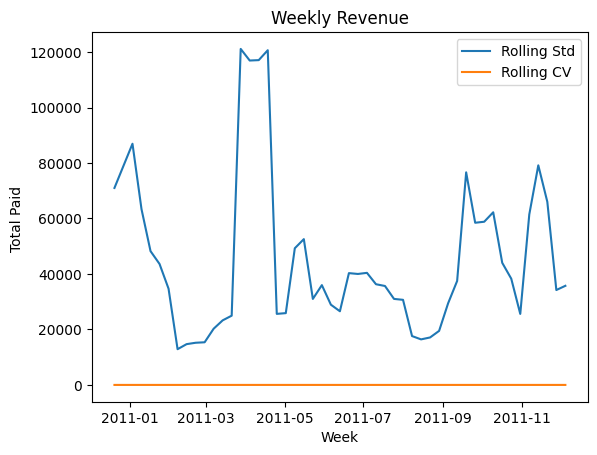

In [46]:
std_per_week_revenue = revenue_weekly.rolling(4).std()
rolling_cv = std_per_week_revenue / mean_per_week_revenue
plt.plot(revenue_weekly.index,std_per_week_revenue,linestyle="-",label="Rolling Std")
plt.plot(revenue_weekly.index,rolling_cv,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid ')
plt.title('Weekly Revenue')

Text(0.5, 1.0, 'Weekly Revenue')

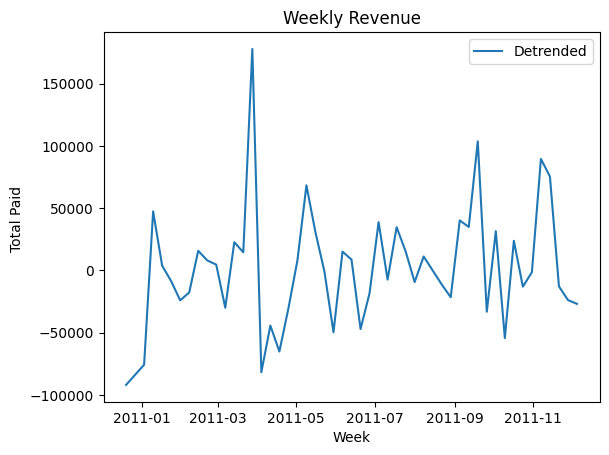

In [47]:
detrended = revenue_weekly - mean_per_week_revenue
plt.plot(detrended.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid ')
plt.title('Weekly Revenue')

###Quantity

Text(0.5, 1.0, 'Weekly Quantity Sold')

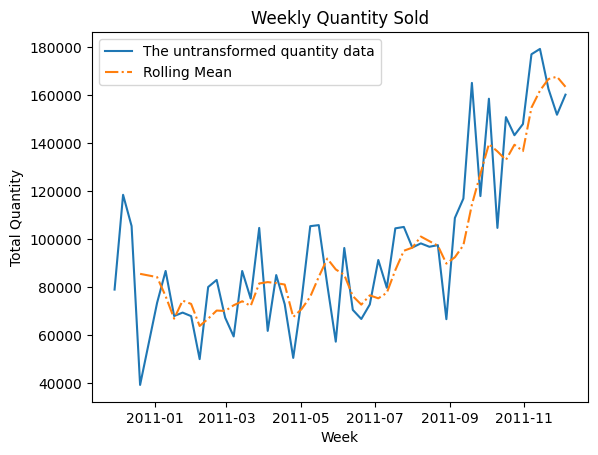

In [48]:
plt.plot(quantity_per_week.index, quantity_per_week['Quantity'],label="The untransformed quantity data")
mean_per_week_quantity = quantity_per_week['Quantity'].rolling(4).mean()
plt.plot(quantity_per_week.index,mean_per_week_quantity,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity')
plt.title('Weekly Quantity Sold')

Text(0.5, 1.0, 'Weekly Quantity Sold')

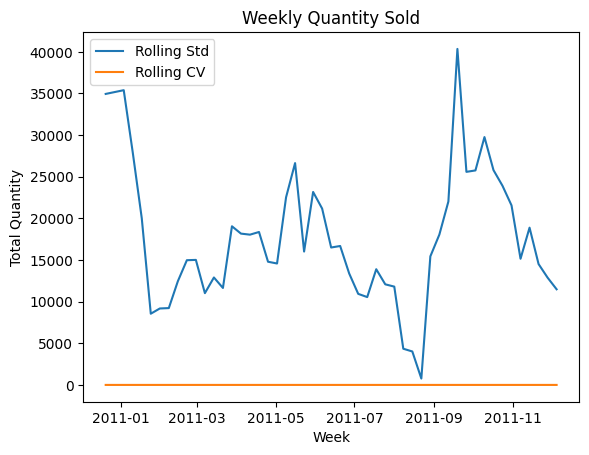

In [49]:
std_per_week_quantity = quantity_per_week['Quantity'].rolling(4).std()
rolling_cv_quantity = std_per_week_quantity / mean_per_week_quantity
plt.plot(quantity_per_week.index,std_per_week_quantity,linestyle="-",label="Rolling Std")
plt.plot(quantity_per_week.index,rolling_cv_quantity,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity')
plt.title('Weekly Quantity Sold')

Text(0.5, 1.0, 'Weekly Quantity Sold')

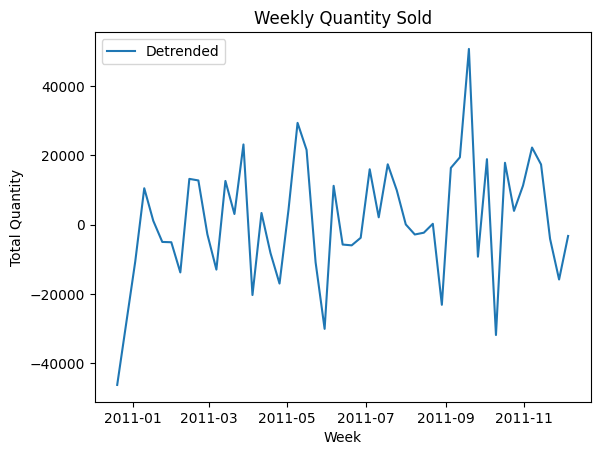

In [50]:
detrended = quantity_per_week['Quantity'] - mean_per_week_quantity
plt.plot(quantity_per_week.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity')
plt.title('Weekly Quantity Sold')

##After Log Transformation

###Revenue

Text(0.5, 1.0, 'Logarithm of Weekly Revenue')

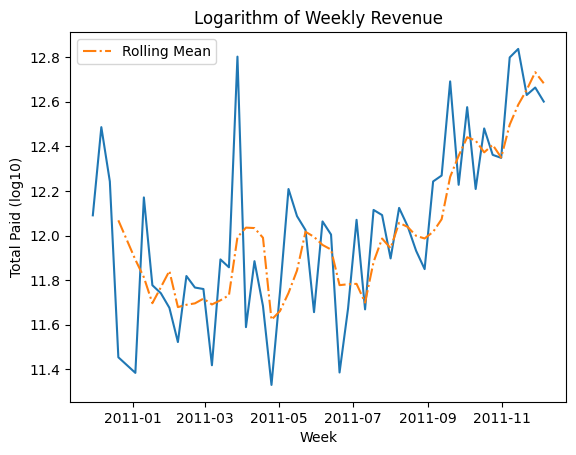

In [51]:
plt.plot(revenue_weekly.index, np.log(revenue_weekly))
mean_per_week_revenue = np.log(revenue_weekly).rolling(4).mean()
plt.plot(revenue_weekly.index,mean_per_week_revenue,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Logarithm of Weekly Revenue')

The plot represents the total weekly revenue after performed log transformation as we can see it has reduced scale effects and helps stabilize the variance. However, the observed upward trend has remained indicating log transformation itself is not sufficient to achieve stationarity. Consequently, further transforming is required through first order differencing.

Text(0.5, 1.0, 'Logarithm of Weekly Revenue')

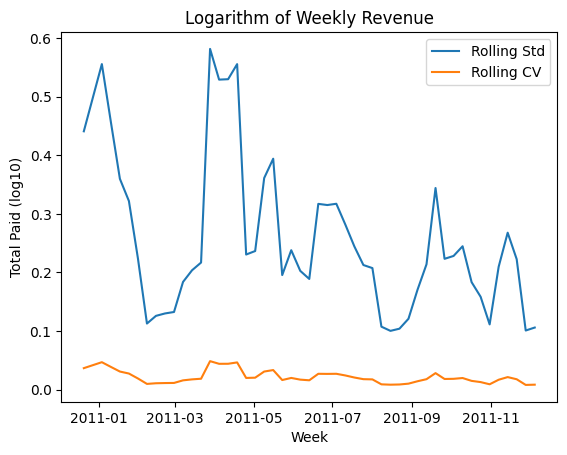

In [52]:
std_per_week_revenue = np.log(revenue_weekly).rolling(4).std()
rolling_cv = std_per_week_revenue / mean_per_week_revenue
plt.plot(revenue_weekly.index,std_per_week_revenue,linestyle="-",label="Rolling Std")
plt.plot(revenue_weekly.index,rolling_cv,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Logarithm of Weekly Revenue')

Text(0.5, 1.0, 'Logarithm of Weekly Revenue')

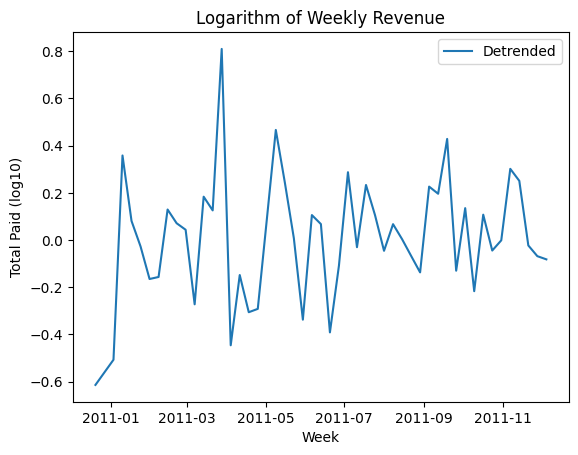

In [53]:
detrended = np.log(revenue_weekly) - mean_per_week_revenue
plt.plot(detrended.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Logarithm of Weekly Revenue')

###Quantity

Text(0.5, 1.0, 'Logarithm of Weekly Quantity Sold')

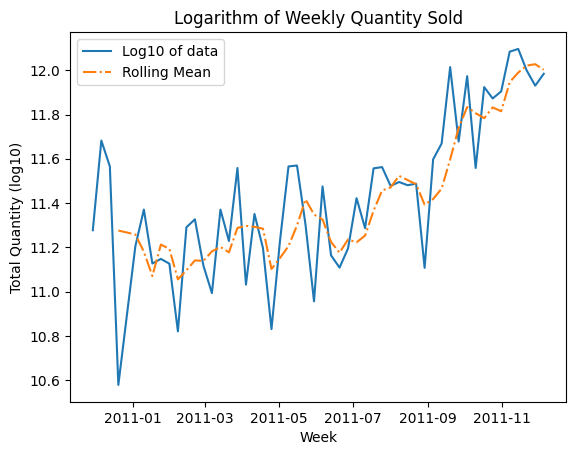

In [54]:
plt.plot(quantity_per_week.index, np.log(quantity_per_week['Quantity']),label="Log10 of data")
mean_per_week_quantity = np.log(quantity_per_week['Quantity']).rolling(4).mean()
plt.plot(quantity_per_week.index,mean_per_week_quantity,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Logarithm of Weekly Quantity Sold')

Text(0.5, 1.0, 'Logarithm of Weekly Quantity Sold')

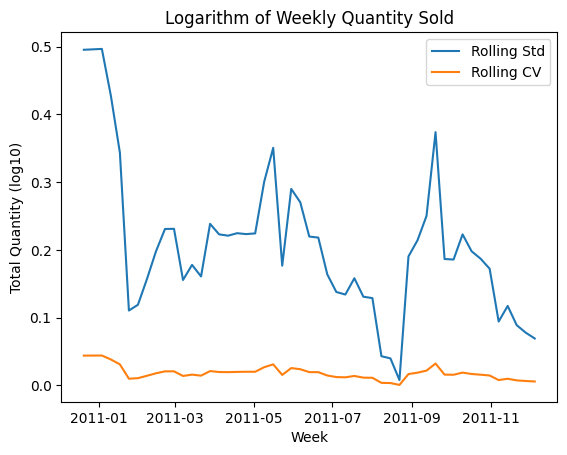

In [55]:
std_per_week_quantity = np.log(quantity_per_week['Quantity']).rolling(4).std()
rolling_cv_quantity = std_per_week_quantity / mean_per_week_quantity
plt.plot(quantity_per_week.index,std_per_week_quantity,linestyle="-",label="Rolling Std")
plt.plot(quantity_per_week.index,rolling_cv_quantity,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Logarithm of Weekly Quantity Sold')

Text(0.5, 1.0, 'Logarithm of Weekly Quantity Sold')

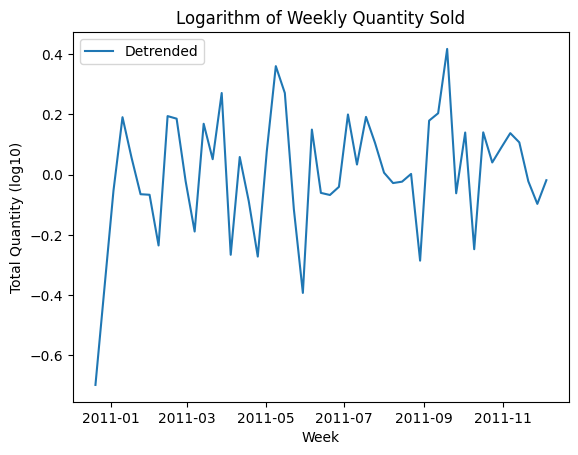

In [56]:
detrended = np.log(quantity_per_week['Quantity']) - mean_per_week_quantity
plt.plot(quantity_per_week.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Logarithm of Weekly Quantity Sold')

##After Differencing


###Revenue

Text(0.5, 1.0, 'Differenced Logarithm of Weekly Revenue')

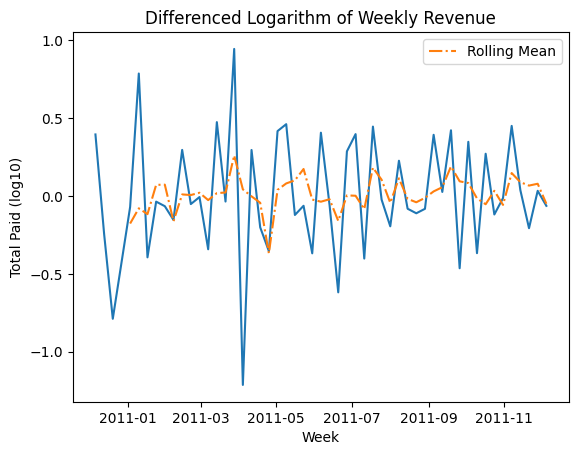

In [57]:
log_revenue = np.log(revenue_weekly)
log_revenue_diff = log_revenue.diff()
plt.plot(revenue_weekly.index,log_revenue_diff)
mean_per_week_diff_revenue = log_revenue_diff.rolling(4).mean()
plt.plot(revenue_weekly.index,mean_per_week_diff_revenue,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Differenced Logarithm of Weekly Revenue')

After differencing we can see that the data has started to oscillate around 0 with no visible long-term trend as it has been removed through differencing. The mean appears to be more stable over time while short term fluctuations remain, but now the series roughly exhibits characteristics of a stationary series.

Text(0.5, 1.0, 'Differenced Logarithm of Weekly Revenue')

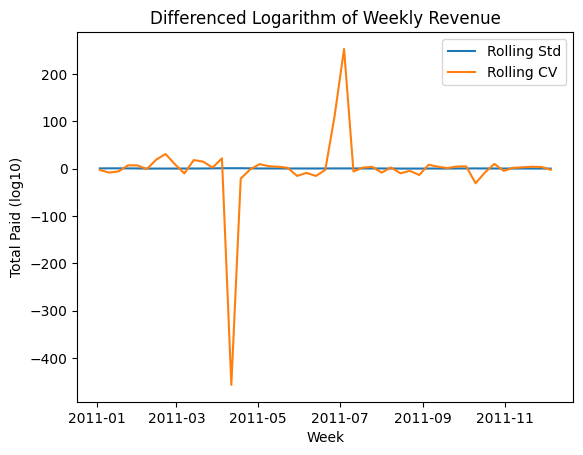

In [58]:
std_per_week_diff_revenue = log_revenue_diff.rolling(4).std()
rolling_cv = std_per_week_diff_revenue / mean_per_week_diff_revenue
plt.plot(revenue_weekly.index,std_per_week_diff_revenue,linestyle="-",label="Rolling Std")
plt.plot(revenue_weekly.index,rolling_cv,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Differenced Logarithm of Weekly Revenue')

Text(0.5, 1.0, 'Logarithm of Weekly Revenue')

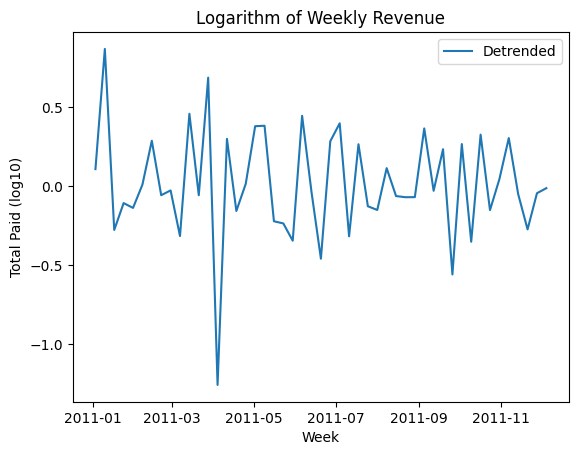

In [59]:
detrended = log_revenue_diff - mean_per_week_diff_revenue
plt.plot(detrended.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Paid (log10)')
plt.title('Logarithm of Weekly Revenue')

###Quantity

Text(0.5, 1.0, 'Differenced Logarithm of Weekly Quantity Sold')

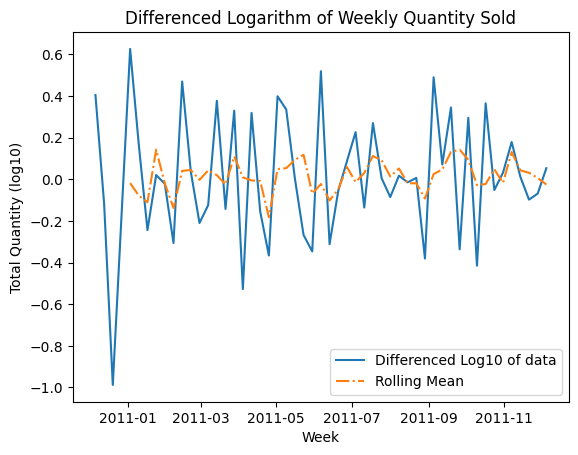

In [60]:
log_quantity = np.log(quantity_per_week['Quantity'])
log_quantity_diff = log_quantity.diff()
plt.plot(quantity_per_week.index, log_quantity_diff,label="Differenced Log10 of data")
mean_per_week_diff_quantity = log_quantity_diff.rolling(4).mean()
plt.plot(quantity_per_week.index,mean_per_week_diff_quantity,linestyle="-.",label="Rolling Mean")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Differenced Logarithm of Weekly Quantity Sold')

Text(0.5, 1.0, 'Differenced Logarithm of Weekly Quantity Sold')

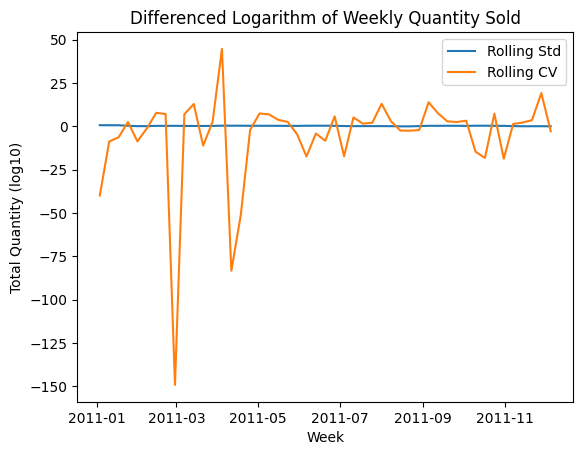

In [61]:
std_per_week_diff_quantity = log_quantity_diff.rolling(4).std()
rolling_cv_diff_quantity = std_per_week_diff_quantity / mean_per_week_diff_quantity
plt.plot(quantity_per_week.index,std_per_week_diff_quantity,linestyle="-",label="Rolling Std")
plt.plot(quantity_per_week.index,rolling_cv_diff_quantity,linestyle="-",label="Rolling CV")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Differenced Logarithm of Weekly Quantity Sold')

Text(0.5, 1.0, 'Differenced Logarithm of Weekly Quantity Sold')

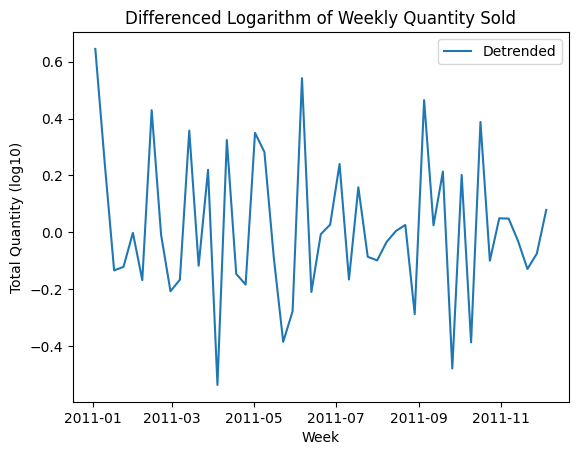

In [62]:
detrended = log_quantity_diff - mean_per_week_diff_quantity
plt.plot(quantity_per_week.index,detrended.values,linestyle="-",label="Detrended")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total Quantity (log10)')
plt.title('Differenced Logarithm of Weekly Quantity Sold')

##Rolling Statistics Choices

A 4-week rolling window has been chosen for the calculation of rolling statistics to smooth weekly fluctuations while preserving the monthly patterns in both mean and variance of the series.

The rolling mean is used to approximate the local trends, while the standard deviation represents the degree of short term variability around that trend.

By observing that the rolling mean is increasing and that the rolling std shows heteroskedastic movement over time we can deduce that the series is non-stationary before implementing log-transform and differencing.

However, once the series has been transformed the rolling mean oscillates around 0 and the rolling std stabilises exhibiting stationary characteristics.

#Stationarity testing and analysis

##Autocorrelation

###Before Transforming

####Revenue

In [63]:
correlation_with_lagged_feature = []
for i in range(0,14):
  lagged_feature = revenue_weekly.shift(i)
  correlation_with_lagged_feature.append({'Lag': i, 'Correlation':revenue_weekly.corr(lagged_feature)})
print(type(correlation_with_lagged_feature))
print(type(correlation_with_lagged_feature[0]))
correlation_with_lagged_feature = pd.DataFrame(correlation_with_lagged_feature)
print(correlation_with_lagged_feature)

<class 'list'>
<class 'dict'>
    Lag  Correlation
0     0     1.000000
1     1     0.546478
2     2     0.503268
3     3     0.398074
4     4     0.397228
5     5     0.360077
6     6     0.438382
7     7     0.366766
8     8     0.408804
9     9     0.317886
10   10     0.269325
11   11     0.268807
12   12    -0.115573
13   13    -0.046742


Text(0.5, 1.0, 'Autocorrelation of weekly revenue')

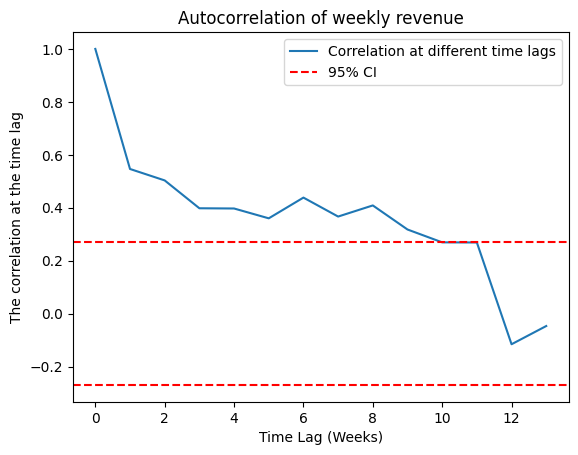

In [64]:
plt.plot(correlation_with_lagged_feature['Lag'],correlation_with_lagged_feature['Correlation'],label='Correlation at different time lags')
conf_level = 1.96/np.sqrt(len(revenue_weekly))
plt.axhline(conf_level, linestyle="--", color="red", label="95% CI")
plt.axhline(-conf_level, linestyle="--", color="red")
plt.legend()
plt.xlabel('Time Lag (Weeks)')
plt.ylabel('The correlation at the time lag')
plt.title('Autocorrelation of weekly revenue')

After performing auto correlation on the raw revenue series it displays a slow decay over the different lag values which indicates that the trend effects are persisting over time proposing that the following series is non-stationary.

####Quantity

In [65]:
correlation_with_lagged_feature = []
for i in range(0,14):
  lagged_feature = revenue_weekly.shift(i)
  correlation_with_lagged_feature.append({'Lag': i, 'Correlation':revenue_weekly.corr(lagged_feature)})
print(type(correlation_with_lagged_feature))
print(type(correlation_with_lagged_feature[0]))
correlation_with_lagged_feature = pd.DataFrame(correlation_with_lagged_feature)
print(correlation_with_lagged_feature)

<class 'list'>
<class 'dict'>
    Lag  Correlation
0     0     1.000000
1     1     0.546478
2     2     0.503268
3     3     0.398074
4     4     0.397228
5     5     0.360077
6     6     0.438382
7     7     0.366766
8     8     0.408804
9     9     0.317886
10   10     0.269325
11   11     0.268807
12   12    -0.115573
13   13    -0.046742


Text(0.5, 1.0, 'Autocorrelation of weekly quantity sold')

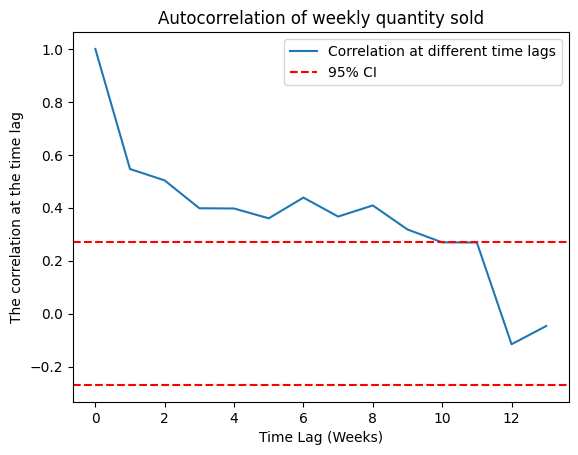

In [66]:
plt.plot(correlation_with_lagged_feature['Lag'],correlation_with_lagged_feature['Correlation'],label='Correlation at different time lags')
conf_level = 1.96/np.sqrt(len(quantity_per_week))
plt.axhline(conf_level, linestyle="--", color="red", label="95% CI")
plt.axhline(-conf_level, linestyle="--", color="red")
plt.legend()
plt.xlabel('Time Lag (Weeks)')
plt.ylabel('The correlation at the time lag')
plt.title('Autocorrelation of weekly quantity sold')

###After Transforming

####Revenue

In [67]:
correlation_with_lagged_feature = []
for i in range(0,14):
  lagged_feature = log_revenue_diff.shift(i)
  correlation_with_lagged_feature.append({'Lag': i, 'Correlation':log_revenue_diff.corr(lagged_feature)})
print(type(correlation_with_lagged_feature))
print(type(correlation_with_lagged_feature[0]))
correlation_with_lagged_feature = pd.DataFrame(correlation_with_lagged_feature)
print(correlation_with_lagged_feature)


<class 'list'>
<class 'dict'>
    Lag  Correlation
0     0     1.000000
1     1    -0.416974
2     2    -0.048010
3     3    -0.061201
4     4     0.025565
5     5    -0.068029
6     6     0.149066
7     7    -0.152990
8     8     0.135422
9     9    -0.027324
10   10    -0.041346
11   11     0.310040
12   12    -0.374136
13   13    -0.078694


Text(0.5, 1.0, 'Autocorrelation of the transformed weekly revenue')

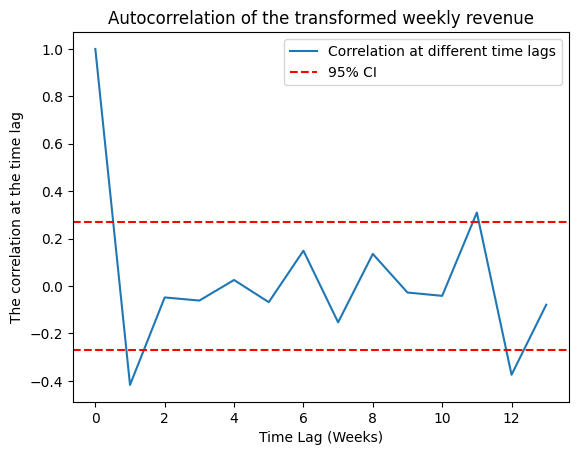

In [68]:
plt.plot(correlation_with_lagged_feature['Lag'],correlation_with_lagged_feature['Correlation'],label='Correlation at different time lags')
conf_level = 1.96/np.sqrt(len(log_revenue_diff))
plt.axhline(conf_level, linestyle="--", color="red", label="95% CI")
plt.axhline(-conf_level, linestyle="--", color="red")
plt.legend()
plt.xlabel('Time Lag (Weeks)')
plt.ylabel('The correlation at the time lag')
plt.title('Autocorrelation of the transformed weekly revenue')

After transforming the time-series and computing autocorrelation for 13 lags, the majority of autocorrelation values appear to be fluctuating around 0 and fall within the 95% confidence interval, indicating that long term dependence has been removed. However, some short-term effects remain, with lag 2,11 and 12 exceeding the confidence interval, suggesting weak residual dependence.

####Quantity

In [69]:
correlation_with_lagged_feature = []
for i in range(0,14):
  lagged_feature = log_quantity_diff.shift(i)
  correlation_with_lagged_feature.append({'Lag': i, 'Correlation':log_quantity_diff.corr(lagged_feature)})
print(type(correlation_with_lagged_feature))
print(type(correlation_with_lagged_feature[0]))
correlation_with_lagged_feature = pd.DataFrame(correlation_with_lagged_feature)
print(correlation_with_lagged_feature)

<class 'list'>
<class 'dict'>
    Lag  Correlation
0     0     1.000000
1     1    -0.419236
2     2    -0.121228
3     3    -0.024464
4     4     0.157237
5     5    -0.175128
6     6     0.166780
7     7    -0.120536
8     8     0.065684
9     9    -0.020414
10   10     0.049366
11   11     0.027914
12   12    -0.050735
13   13    -0.072696


Text(0.5, 1.0, 'Autocorrelation of the transformed weekly quantity sold')

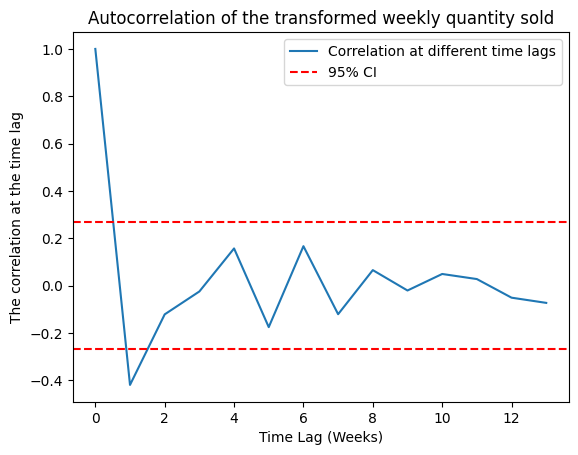

In [70]:
plt.plot(correlation_with_lagged_feature['Lag'],correlation_with_lagged_feature['Correlation'],label='Correlation at different time lags')
conf_level = 1.96/np.sqrt(len(log_quantity_diff))
plt.axhline(conf_level, linestyle="--", color="red", label="95% CI")
plt.axhline(-conf_level, linestyle="--", color="red")
plt.legend()
plt.xlabel('Time Lag (Weeks)')
plt.ylabel('The correlation at the time lag')
plt.title('Autocorrelation of the transformed weekly quantity sold')

##Partial Autocorrelation

In [71]:
import statsmodels.api as sm

###Before Transforming

####Revenue

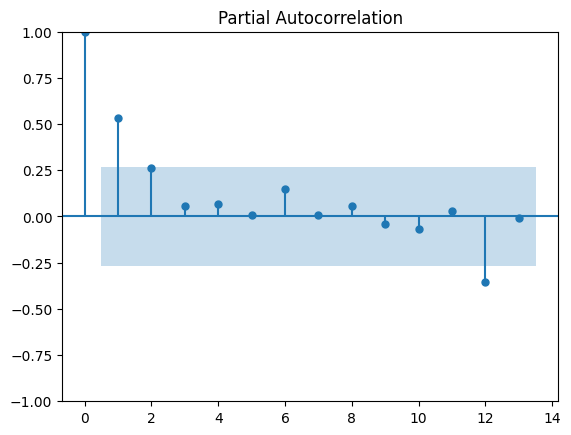

In [72]:
# Calculate PACF
pacf_values = sm.tsa.pacf(revenue_weekly, nlags=13)

# Plot PACF
sm.graphics.tsa.plot_pacf(revenue_weekly, lags=13)
plt.show()

While the autocorrelation function measures the overall dependence across lags, the partial autocorrelation function is used to identify direct relationships between the series and its lagged values after removing the effect of itermediate lags.

The partial autocorrelation has been calculated for 13 lags on the revenue, a significant spike has been observed at lag 1 and 12, while most subsequent lags fall within the 95% confidence interval. However, since the series exhibits clear trend and non-stationary behaviour, the PCAF at this point reflects the trend driven dependence rather than stable autoregressive structure.

####Quantity

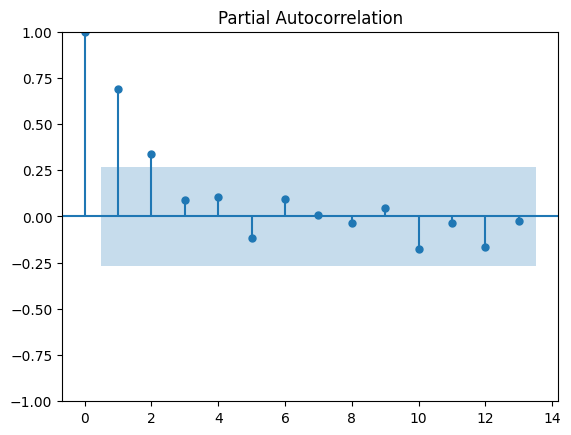

In [73]:
# Calculate PACF
pacf_values = sm.tsa.pacf(quantity_per_week, nlags=13)

# Plot PACF
sm.graphics.tsa.plot_pacf(quantity_per_week, lags=13)
plt.show()

###After Transforming

####Revenue

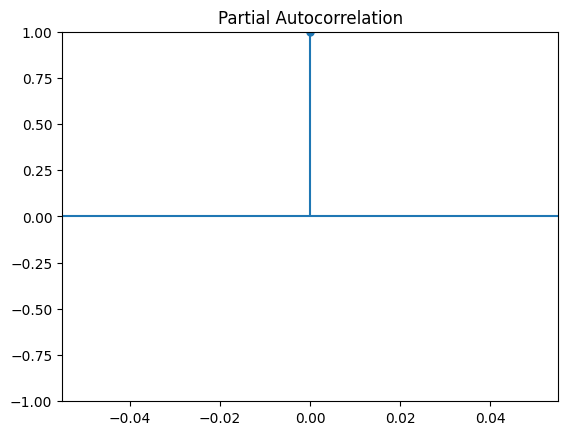

In [74]:
# Calculate PACF
pacf_values = sm.tsa.pacf(log_revenue_diff, nlags=13)

# Plot PACF
sm.graphics.tsa.plot_pacf(log_revenue_diff, lags=13)
plt.show()

Once the series has been transformed and differenced, the PACF has been computed once more, with a single lag at 0 and no other significant lags visible thus there is no statistically significant direct autoregressive dependence remaining in the series and any remaining dependece is indirect and short-term. Which is consistent with the autocorrelation analysis and further supports that the transformed series is approximately stationary.

####Quantity

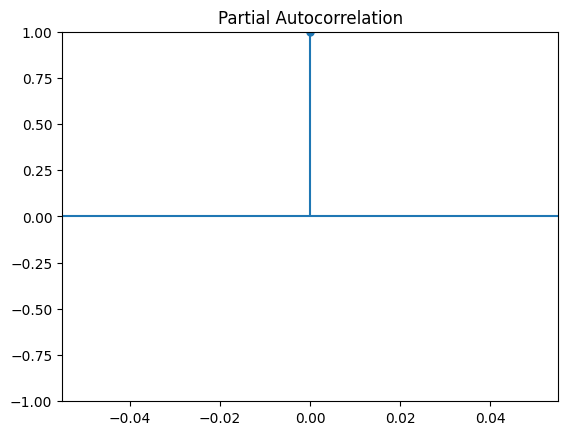

In [75]:
# Calculate PACF
pacf_values = sm.tsa.pacf(log_quantity_diff, nlags=5)

# Plot PACF
sm.graphics.tsa.plot_pacf(log_quantity_diff, lags=5)
plt.show()

#Conclusion

##Quantity Sold EDA

Analysis has also been completed on the quantity sold, aggregated weekly, with the same transformation pipeline as for revenue. The series exhibits non-stationary characterisrtics prior to trasformation after log transforming and differencing, consistent with the findings for revenue. Detailed diagnostic is omitted for brevity.

##Findings

The exploratory analysis examined the temporal structure of weekly retail revenue, focusing on trend, variability and dependence over time. Visual inspection and rolling statistics revelead clear non-stationary pattern in the raw series, characterised by a positive trend and time-varying variance. Log transformation and first order differencing have improved mean and variance stability. Autocorrelation and partial autocorrelation analysis further revealed that long-range dependence has been removed, with only short term effects remaining. Together, these findings suggest that the transformed series displays signs of approximate stationarity, which provides a suitable foundation for time-series modelling and forecasting.